# Learning outcomes:   Logistic Regression
****After completing this exercise, you should be able to understand and perform below tasks. ***
1. Building classification model using logistic regression technique. 
2. Validating the model results. 
3. Handling multicollinearity and dimensionality reduction. 
4. Evaluation of error metrics.  
5. Applying the models on un-seen data 
    a. Splitting data into train and test data sets 
    b. Comparing the error metrics 
6. Interpretation of the results. 
7. ROC curve. 


Modeling Methodology:

1. Understand the use case (Business Problem)
2. Undersatand the attributes
3. Define your target variable
4. Data cleaning/manipulation/transformation
5. Train-test-split
6. Model building (logistic reg)
7. Confusion Matrix & testing resuslts

The “Bank.txt” file consists of the data related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, to access if the product (bank term deposit) would be (or not) subscribed. The data and attribute description given. 

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [123]:
df=pd.read_csv('C:/Users/alexi/Documents/GitHub/data-labs/module-2/Lab-Logistic_Regression/bank.txt',sep=';')


Understand the data and perform required preprocessing/cleaning steps. Explain the reason for each step.
Hint: i) Use functions like .info(), .describe(), .dtypes, ..... 
      ii) Check for null values

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [17]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


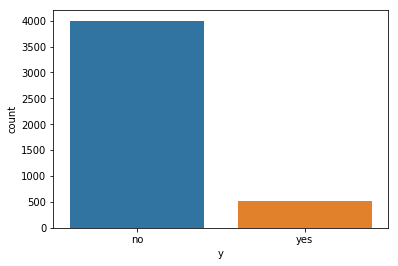

In [13]:
sns.countplot(x='y',data=df)

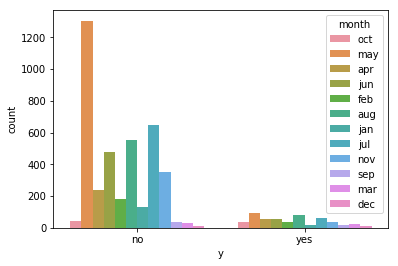

In [18]:
sns.countplot(x='y',hue='month',data=df)

[Text(0, 0, 'unemployed'),
 Text(0, 0, 'services'),
 Text(0, 0, 'management'),
 Text(0, 0, 'management'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'management'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'services'),
 Text(0, 0, 'services'),
 Text(0, 0, 'admin.')]

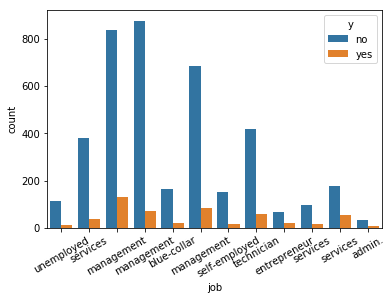

In [29]:
g=sns.countplot(x='job',hue='y',data=df,)
g.set_xticklabels(labels=df.job,rotation=30)

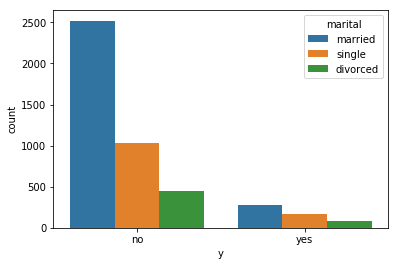

In [37]:
sns.countplot(x='y',hue='marital',data=df)

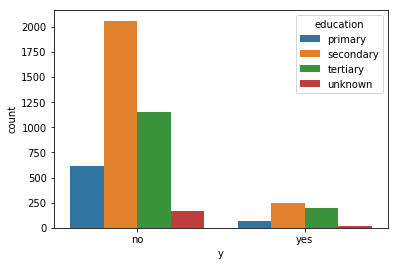

In [38]:
sns.countplot(x='y',hue='education',data=df)

In [124]:
df1=pd.get_dummies(data=df, columns=['default','housing','loan'], drop_first=True)
df11=pd.get_dummies(data=df1, columns=['marital','month'])

In [88]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [113]:
df11.dtypes

age                  int64
job                 object
education           object
balance              int64
contact             object
day                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
y                   object
default_yes          uint8
housing_yes          uint8
loan_yes             uint8
marital_divorced     uint8
marital_married      uint8
marital_single       uint8
month_apr            uint8
month_aug            uint8
month_dec            uint8
month_feb            uint8
month_jan            uint8
month_jul            uint8
month_jun            uint8
month_mar            uint8
month_may            uint8
month_nov            uint8
month_oct            uint8
month_sep            uint8
dtype: object

Create a new variable "outcome" based on "y" if y="yes" then outcome=1 else outcome=0 and convert  it to appropriate data type

In [125]:
df11.y.map({'yes':1,'no':0})

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4491    0
4492    0
4493    0
4494    1
4495    0
4496    0
4497    0
4498    0
4499    0
4500    0
4501    0
4502    0
4503    1
4504    1
4505    1
4506    0
4507    0
4508    0
4509    0
4510    0
4511    1
4512    0
4513    0
4514    0
4515    0
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [122]:
df11[['y','housing_yes','loan_yes']] = df11[['y','housing_yes','loan_yes']].astype('int64')


ValueError: invalid literal for int() with base 10: 'no'

In [126]:
df11.dtypes

age                  int64
job                 object
education           object
balance              int64
contact             object
day                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
y                   object
default_yes          uint8
housing_yes          uint8
loan_yes             uint8
marital_divorced     uint8
marital_married      uint8
marital_single       uint8
month_apr            uint8
month_aug            uint8
month_dec            uint8
month_feb            uint8
month_jan            uint8
month_jul            uint8
month_jun            uint8
month_mar            uint8
month_may            uint8
month_nov            uint8
month_oct            uint8
month_sep            uint8
dtype: object

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df11.drop('y',axis=1),df11.y, test_size=0.3,random_state=11)

Split the data into train and test datasets 

Implement the logistic regression model using all attributes and predict the results 

In [128]:
import statsmodels.api as sm
logit=sm.Logit(y_train,X_train)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Identify appropriate error metric for this problem, and compute the values for these metrics on both train and test data.
Generate Confusion Matrix and check the results. Accuracy, Precision and Recall.

Now, Identify the important attributes and build model again. Predict the results and compute the error matrices(Confusion matrix). What do you see?